In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
ausair = pd.read_csv('data/passengers.csv')
ausair = ausair['num_passengers']

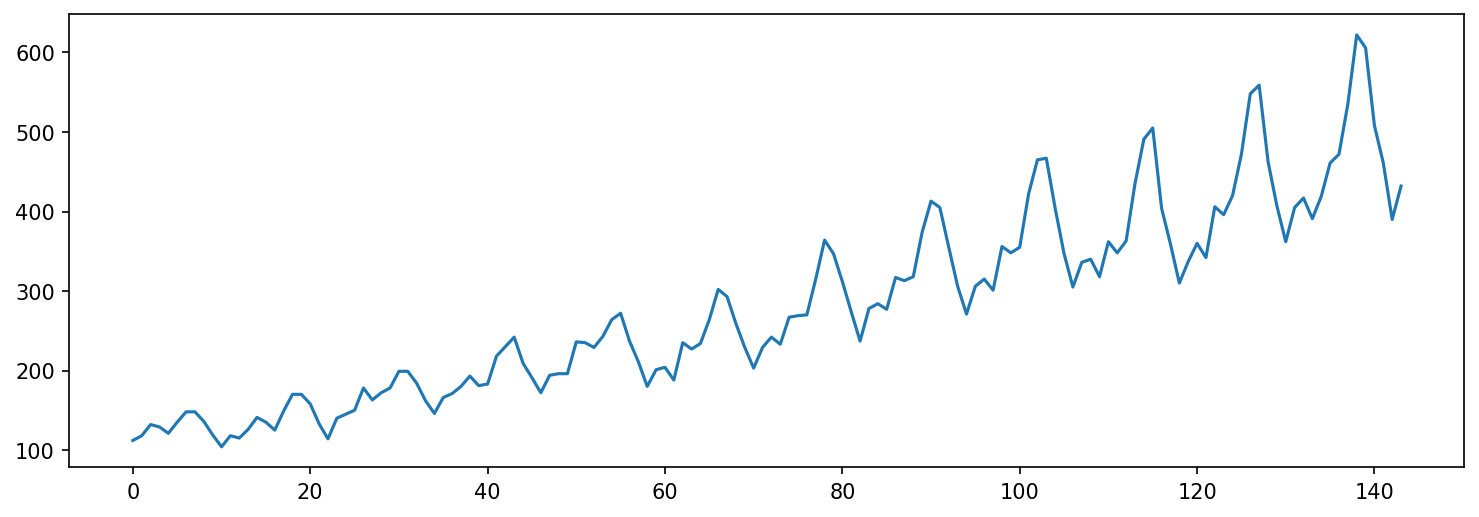

In [4]:
plt.figure(figsize=(12, 4), dpi=150)
plt.plot(ausair)
plt.show()

In [16]:
i = 1
s = 12
a = lambda y: pow(i, y)
fur_cos = lambda n: math.cos((2 * n * math.pi * i) / s)
fur_sin = lambda n: math.sin((2 * n * math.pi * i) / s)

In [17]:
theta = np.array([1,2,3])
beta1 = np.array([1,2,3])
beta2 = np.array([1,2,3])

In [25]:
def approximation(data: np.array, theta: np.array, beta1: np.array, beta2: np.array,  N: int, s:int) -> np.array:
    forcast = []
    for i in range(len(data)):
        a = lambda y: pow(i, y)
        fur_cos = lambda n: math.cos((2 * n * math.pi * i) / s)
        fur_sin = lambda n: math.sin((2 * n * math.pi * i) / s)
        
        pred = np.array( list( map(a, range(3)) ) ) @ theta + np.array( list( map(fur_cos, range(N)) ) ) @ beta1 + np.array( list( map(fur_sin, range(N)) ) ) @ beta2
        forcast.append(pred)
    return np.array(forcast)

In [88]:
def approximation(data: np.array, theta: np.array, beta1: np.array, beta2: np.array,  N: int, s:int) -> np.array:
    forcast = []
    for i in range(len(data)):
        a = lambda y: pow(i, y)
        fur_cos = lambda n: math.cos((2 * n * math.pi * i) / s)
        fur_sin = lambda n: math.sin((2 * n * math.pi * i) / s)
        
        pred = (np.array( list( map(a, range(3)) ) ) @ theta) * ( np.array( list( map(fur_cos, range(N)) ) ) @ beta1 + np.array( list( map(fur_sin, range(N)) ) ) @ beta2 )
        forcast.append(pred)
    return np.array(forcast)

In [89]:
def mean_square_error(data: np.array, theta: np.array, beta1: np.array, beta2: np.array, N, s) -> int :
    forcast = approximation(ausair.values, theta, beta1, beta2, N, s)
    return ((forcast - data)**2).mean()

In [90]:
minn = 100000
mini = -1
for i in range(5, 20):
    mse = lambda x: mean_square_error(ausair.values, x[0:3], x[3: 3 + i], x[3 + i:], i, 12)
    df = minimize(mse, np.ones(3 + 2 * i))
    
    if df.fun < minn:
        mini = i
        minn = df.fun
        theta = df.x[0: 3]
        beta1 = df.x[3: 3 + i]
        beta2 = df.x[3 + i:]

In [91]:
print(minn)
print(mini)

138.92901053134537
13


In [92]:
forcast = approximation(ausair.values, theta, beta1, beta2, mini, 12)

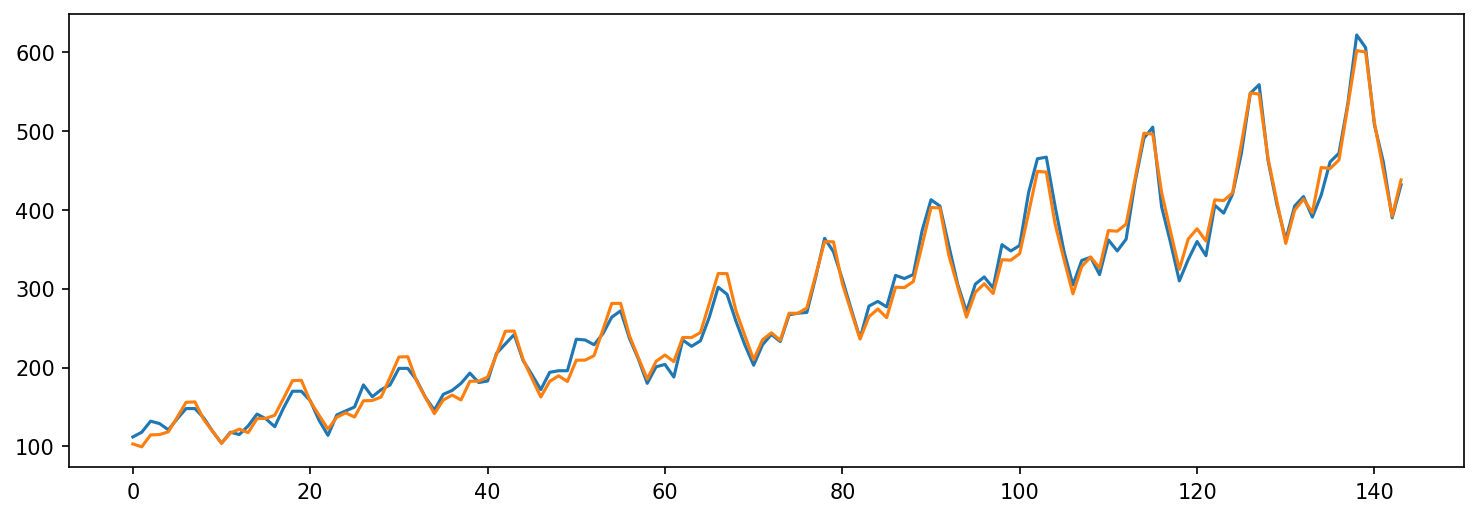

In [93]:
plt.figure(figsize=(12, 4), dpi=150)
plt.plot(ausair.values)
plt.plot(forcast)
plt.show()